# Ch5

In [1]:
import numpy as np
from icecream import ic

import ch4
import ch5

%load_ext autoreload
%autoreload 2

## 5.1

In [2]:
# .1 略

In [3]:
# .2
def sample(rng, dices=2):
    return np.sum(rng.choice(range(1, 7), size=dices))


rng = np.random.default_rng(0)
ic(sample(rng))
ic(sample(rng, 100000))

ic| sample(rng): 10
ic| sample(rng, 100000): 349795


349795

In [4]:
# .3
trial = 1_000

V, n = 0, 0

for _ in range(trial):
    s = sample(rng)
    n += 1
    V += (s - V) / n
    ic(V)

ic| V: 7.0
ic| V: 6.0
ic| V: 6.333333333333333
ic| V: 7.0
ic| V: 7.0
ic| V: 6.666666666666667
ic| V: 6.714285714285714
ic| V: 6.75
ic| V: 7.0
ic| V: 7.1
ic| V: 7.454545454545454
ic| V: 7.083333333333333
ic| V: 7.076923076923077
ic| V: 7.357142857142857
ic| V: 7.3999999999999995
ic| V: 7.249999999999999
ic| V: 7.411764705882352
ic| V: 7.388888888888888
ic| V: 7.368421052631579
ic| V: 7.5
ic| V: 7.666666666666667
ic| V: 7.636363636363637
ic| V: 7.565217391304349
ic| V: 7.500000000000001
ic| V: 7.440000000000001
ic| V: 7.423076923076924
ic| V: 7.407407407407408
ic| V: 7.321428571428572
ic| V: 7.379310344827587
ic| V: 7.466666666666668
ic| V: 7.419354838709679
ic| V: 7.375000000000002
ic| V: 7.393939393939395
ic| V: 7.470588235294119
ic| V: 7.400000000000001
ic| V: 7.416666666666668
ic| V: 7.486486486486488
ic| V: 7.447368421052633
ic| V: 7.461538461538463
ic| V: 7.525000000000001
ic| V: 7.414634146341465
ic| V: 7.333333333333335
ic| V: 7.279069767441862
ic| V: 7.272727272727274
ic| V: 7.2

## 5.3

In [5]:
# .1

env = ch4.GridWorld()
# dummy action
action = 0

next_state, reward, done = env.step(action)

ic(next_state)
ic(reward)
_ = ic(done)

ic| next_state: (1, 0)
ic| reward: 0
ic| done: False


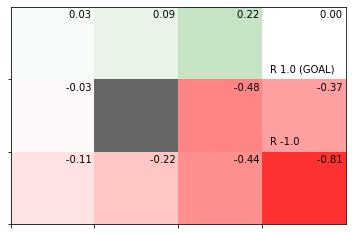

In [6]:
# .3
env = ch4.GridWorld()
agent = ch5.RandomAgent()

episodes = 1_000

for _ in range(episodes):
    # init
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.add(state, action, reward)
        if done:
            agent.eval()
            break
        state = next_state

env.render_v(agent.V)

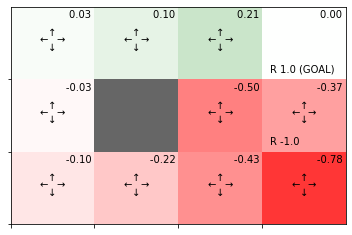

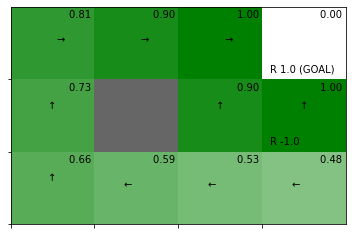

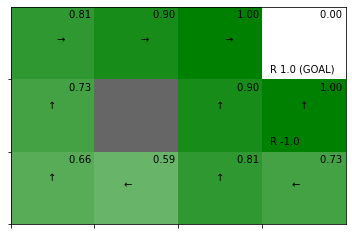

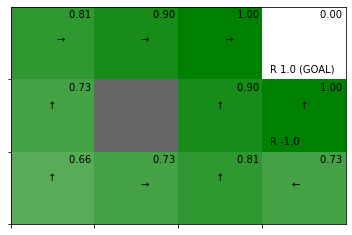

In [7]:
# 再掲：dpの実行結果
env = ch4.GridWorld()
gamma = 0.9
pi = ch4.policy_iter(env, gamma, is_render=True)

## 5.4

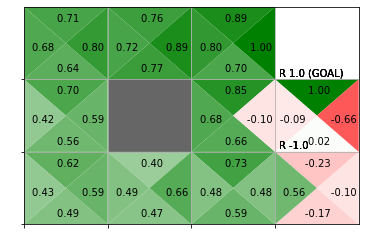

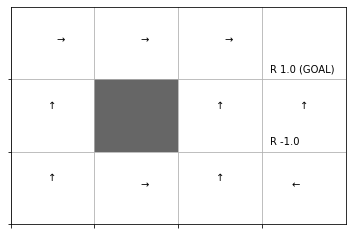

In [8]:
# .5
env = ch4.GridWorld()
agent = ch5.McAgent()


episodes = 10_000

for episode in range(episodes):
    # init
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.add(state, action, reward)
        if done:
            agent.update()
            break
        state = next_state

env.render_q(agent.Q)

## 5.5

In [9]:
def importance_sampling(rng, n, xs, p_target, q_proposal):
    weight = p_target / q_proposal

    xs_weighted = xs * weight
    samples = rng.choice(xs_weighted, size=n, p=q_proposal)
    return samples

In [10]:
# .2
rng = np.random.default_rng(seed=0)

x = np.array([1, 2, 3])
pi = np.array([0.1, 0.1, 0.8])

# expected value
e = np.dot(x, pi)
print("E_pi[x]", e)

# Monte Carlo method
n = 100
samples = importance_sampling(rng, n, x, pi, pi)
print(f"MC: {np.mean(samples):.2f} (var: {np.var(samples):.2f})")

E_pi[x] 2.7
MC: 2.71 (var: 0.41)


In [11]:
# importance sampling
b = np.array([1 / 3, 1 / 3, 1 / 3])
n = 100
samples = importance_sampling(rng, n, x, pi, b)
print(f"IS: {np.mean(samples):.2f} (var: {np.var(samples):.2f})")

IS: 3.02 (var: 10.73)


In [12]:
# .3
# importance sampling
b = np.array([0.2, 0.2, 0.6])
n = 100
samples = importance_sampling(rng, n, x, pi, b)
print(f"IS: {np.mean(samples):.2f} (var: {np.var(samples):.2f})")

IS: 2.94 (var: 2.43)
